<h1>Sentiment Analysis using Twitter API</h1>


In [7]:
!pip install tweepy==4.9.0

<h3>Twitter API keys</h3>

In [8]:
API_Key         = "vmWFYgxtsvC4WeCfhw9XpFmdn"
API_Secret      = "sb9EFTcndlRIO5tAyOhR9u5bEV6SXvq7fWkvMhfwhVe1rNziur"
Bearer_Token    = "AAAAAAAAAAAAAAAAAAAAALk%2BxQEAAAAAb1gnot7iKfKCLE%2FqDzpYRl7S7J4%3DHjJCCLd1Eu39LPLcQqgCAB3h3jKnY55nk4SWqtYFRxVawFqHbi"
Access_Token    = "1862885295043035136-8iKf4kP8DN2gB6819181enPsTX3q7p"
Access_Secret   = "ESEy5TpYKc3GV4ZWei2nyntpMdBEitBbjxxhiXZbt3Lgc"


<h3>Importing required libraries</h3>

In [9]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
client = tweepy.Client(Bearer_Token)

<h3>Extracting tweets</h3>

In [11]:
query = '#Elections2025 -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                              # How many pages to retrieve
)

In [12]:
tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

'Elections 2025 are heating up! 🗳️🔥 Who's your pick for the leader who'll help shape our future? Let's talk policies, promises, and people power! Share your thoughts below! #Elections2025 #VoteForChange 🌍🤔' #Elections2025 #VoteForChange #FutureLeaders
LOOK: The COMELEC releases the official ballot template for the May 12, 2025 National, Local, and BARMM Parliamentary Elections for overseas absentee voters. 

The ballot lists 66 senatorial candidates and 155 party-list groups. @bncdotph #Elections2025 https://t.co/vbO1Dm6qm7
How Long Until the Elections? Check https://t.co/7HXiL5GArl!

A countdown timer on https://t.co/7HXiL5GArl shows exactly how many seconds remain until election day. Stay tuned and watch the countdown!

📢 #Elections2025 #Countdown #CenkFi
33 prospective candidates. 9 to go! #Elections2025 #PNM
Heres my #BTC Long I took. Looking to sweep the 99k level. take 50% and let the rest ride.

Elections coming up, i think we might run befroe we dump.

#elections2025 #crypto ht

<h3>Creating Data Frame for Extracted Tweets</h3>

In [13]:
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...
1,LOOK: The COMELEC releases the official ballot...
2,How Long Until the Elections? Check https://t....
3,33 prospective candidates. 9 to go! #Elections...
4,Heres my #BTC Long I took. Looking to sweep th...


In [14]:
tweet_list_df.to_csv('appletweets.csv', index=False) 

<h3>Function to Clean Tweets</h3>

In [15]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vasal\AppData\Local\Temp\ipykernel_14312\1125281311.py:8: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub('RT @\w+: '," ", sentence)
C:\Users\vasal\AppData\Local\Temp\ipykernel_14312\1125281311.py:11: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)


In [16]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [17]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...
2,How Long Until the Elections? Check https://t....,how long until the elections check countdown t...
3,33 prospective candidates. 9 to go! #Elections...,33 prospective candidates 9 to go elections202...
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...


<h3>Assigning polarity and subjectivity </h3>

In [18]:
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [19]:
tweet_list_df

,text,cleaned,polarity,subjectivity
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...,0.000000,0.125000
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...,0.000000,0.000000
2,How Long Until the Elections? Check https://t....,how long until the elections check countdown t...,0.233333,0.383333
3,33 prospective candidates. 9 to go! #Elections...,33 prospective candidates 9 to go elections202...,0.000000,0.000000
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...,-0.050000,0.400000
5,Germany accuses Musk of meddling in upcoming e...,germany accuses musk of meddling in upcoming e...,0.500000,0.500000
6,🇷🇴 CLUJ MENTIONED!!! 🇷🇴\n\n#Romania #Cluj #Clu...,cluj mentioned romania cluj clujnapoca george...,0.000000,0.000000
7,Elections 2025 are heating up! 🗳️🔥 Who's got y...,elections 2025 are heating up who got your vot...,0.000000,0.125000
8,🇽🇰🇦🇱🇲🇰🇭🇷 Key elections across the Balkans in 2...,key elections across the balkans in 2025 will...,0.000000,0.562500
9,JANUARY 6TH Is Coming...\n\nSupport Those Who ...,january 6th is coming support those who stood ...,0.000000,0.000000


In [20]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [21]:
for index, row in tweet_list_df['cleaned'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

In [22]:
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...,0.000000,0.125000,positive,0.000,0.800,0.200,0.7579
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...,0.000000,0.000000,positive,0.056,0.873,0.071,0.1531
2,How Long Until the Elections? Check https://t....,how long until the elections check countdown t...,0.233333,0.383333,neutral,0.000,1.000,0.000,0.0000
3,33 prospective candidates. 9 to go! #Elections...,33 prospective candidates 9 to go elections202...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...,-0.050000,0.400000,negative,0.082,0.918,0.000,-0.3818


In [23]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

In [24]:
tweet_list_df_negative

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...,-0.050000,0.400000,negative,0.082,0.918,0.0,-0.3818
5,Germany accuses Musk of meddling in upcoming e...,germany accuses musk of meddling in upcoming e...,0.500000,0.500000,negative,0.103,0.897,0.0,-0.3400
24,The notorious criminal organization known as t...,the notorious criminal organization known as t...,0.020202,0.448359,negative,0.318,0.682,0.0,-0.9313


In [25]:
tweet_list_df_positive

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...,0.000000,0.125000,positive,0.000,0.800,0.200,0.7579
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...,0.000000,0.000000,positive,0.056,0.873,0.071,0.1531
8,🇽🇰🇦🇱🇲🇰🇭🇷 Key elections across the Balkans in 2...,key elections across the balkans in 2025 will...,0.000000,0.562500,positive,0.000,0.852,0.148,0.5719
9,JANUARY 6TH Is Coming...\n\nSupport Those Who ...,january 6th is coming support those who stood ...,0.000000,0.000000,positive,0.000,0.909,0.091,0.4019
10,"@visegrad24 You forgot to mention, that in pol...",you forgot to mention that in polls aking for...,-0.012500,0.387500,positive,0.000,0.924,0.076,0.4939
11,"🚨 BIG PROMISE!\n\nCongress pledges ₹3,000 mont...",big promise congress pledges 3 000 monthly su...,0.166667,0.383333,positive,0.000,0.778,0.222,0.7906
13,Can @PierrePoilievre really deliver what he sa...,can really deliver what he says or is it just ...,0.085556,0.434444,positive,0.000,0.879,0.121,0.5106
16,Well Done @SyyedSuhail 🎯🔝\n@republic @Republic...,well done bharat delhielection2025 yogiji modi...,0.000000,0.000000,positive,0.000,0.826,0.174,0.2732
18,I got this feeling the Cameroon 2025 elections...,i got this feeling the cameroon 2025 elections...,0.000000,1.000000,positive,0.000,0.933,0.067,0.1280
20,Excited for 2025? Here are 5 elections around ...,excited for 2025 here are 5 elections around t...,0.362500,0.650000,positive,0.052,0.710,0.239,0.7003


<h3>Analysing the positive,negative and neutral percentages</h3>

In [26]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [27]:
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
sentiment,,
positive,22,51.16
neutral,18,41.86
negative,3,6.98


In [28]:
type(tweet_list_df['cleaned'])

pandas.core.series.Series

In [29]:
total_comments_positive = ' '.join(tweet_list_df_positive['cleaned'])

<h3>creating positive wordcloud</h3>

In [30]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

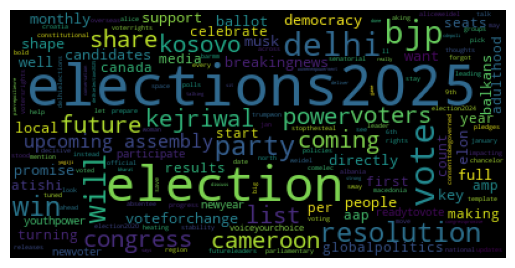

In [31]:
plt.imshow(wordcloud)
plt.axis('off')

In [32]:
total_comments_negative = ' '.join(tweet_list_df_negative['cleaned'])

<h3>creating negative wordcloud</h3>

In [33]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

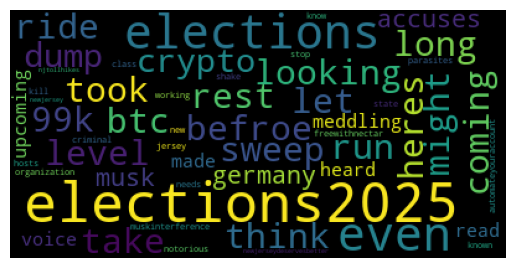

In [34]:
plt.imshow(wordcloud)
plt.axis('off')

In [35]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [36]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,191.67
neutral,147.00
positive,201.86


In [37]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,29.67
neutral,20.83
positive,30.18


In [38]:
tweet_list_df

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...,0.000000,0.125000,positive,0.000,0.800,0.200,0.7579,228,33
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...,0.000000,0.000000,positive,0.056,0.873,0.071,0.1531,235,35
2,How Long Until the Elections? Check https://t....,how long until the elections check countdown t...,0.233333,0.383333,neutral,0.000,1.000,0.000,0.0000,176,27
3,33 prospective candidates. 9 to go! #Elections...,33 prospective candidates 9 to go elections202...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,51,8
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...,-0.050000,0.400000,negative,0.082,0.918,0.000,-0.3818,159,30
5,Germany accuses Musk of meddling in upcoming e...,germany accuses musk of meddling in upcoming e...,0.500000,0.500000,negative,0.103,0.897,0.000,-0.3400,169,22
6,🇷🇴 CLUJ MENTIONED!!! 🇷🇴\n\n#Romania #Cluj #Clu...,cluj mentioned romania cluj clujnapoca george...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,64,7
7,Elections 2025 are heating up! 🗳️🔥 Who's got y...,elections 2025 are heating up who got your vot...,0.000000,0.125000,neutral,0.077,0.846,0.077,0.0000,196,25
8,🇽🇰🇦🇱🇲🇰🇭🇷 Key elections across the Balkans in 2...,key elections across the balkans in 2025 will...,0.000000,0.562500,positive,0.000,0.852,0.148,0.5719,206,29
9,JANUARY 6TH Is Coming...\n\nSupport Those Who ...,january 6th is coming support those who stood ...,0.000000,0.000000,positive,0.000,0.909,0.091,0.4019,231,28


<h3>Creating countplot</h3>

C:\Users\vasal\AppData\Local\Temp\ipykernel_14312\2558106060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=tweet_list_df, palette='coolwarm')


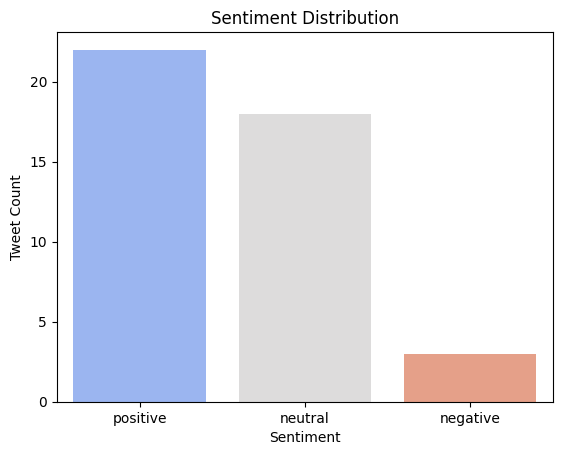

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=tweet_list_df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


<h3>Creating wordcloud for cleaned Tweets</h3>

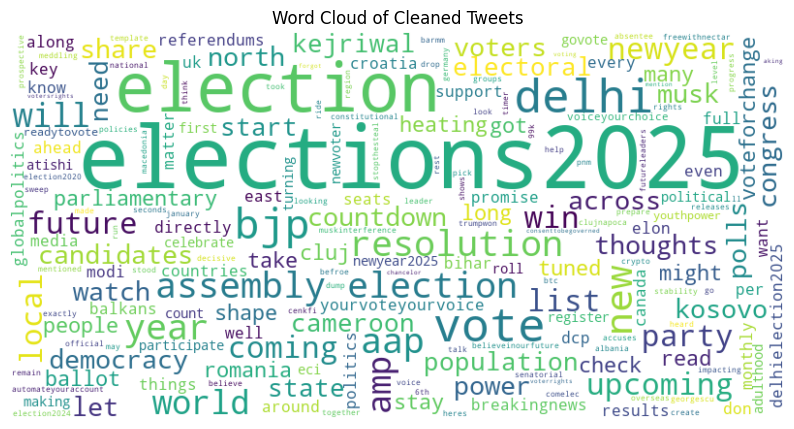

In [40]:
from wordcloud import WordCloud

all_words = ' '.join(tweet_list_df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()


<h3>Creating Scatter Plot</h3>

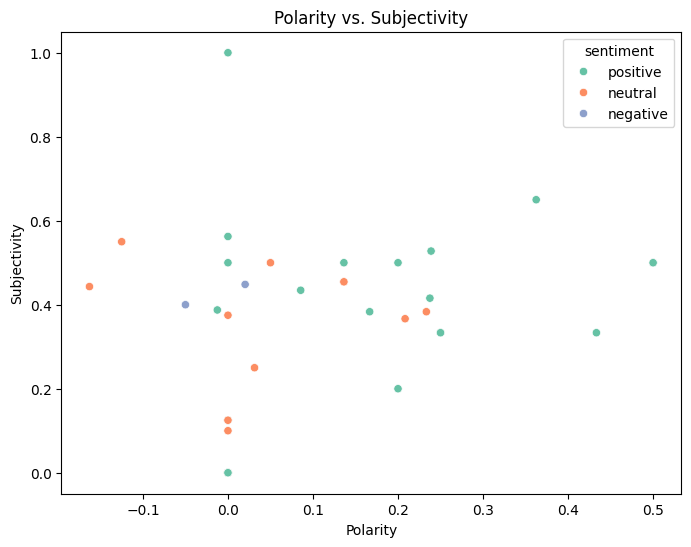

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='polarity', y='subjectivity', hue='sentiment', data=tweet_list_df, palette='Set2')
plt.title('Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


<h3>Creating a Histogram</h3>

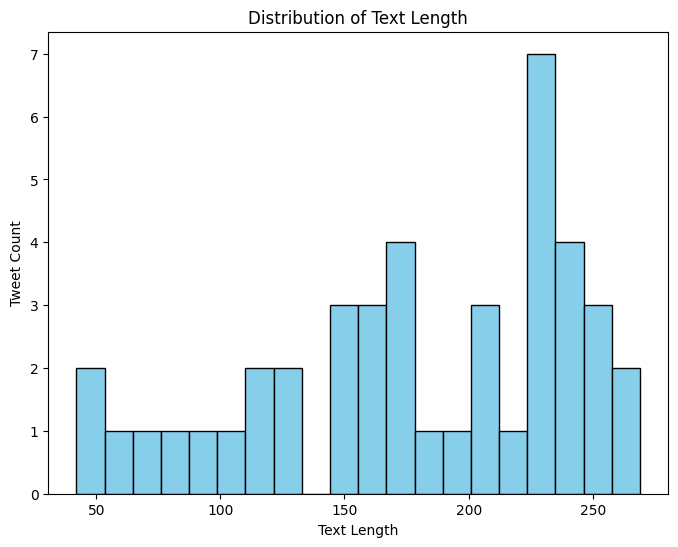

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(tweet_list_df['text_len'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Tweet Count')
plt.show()


<h3>Creating a Boxplot</h3>

C:\Users\vasal\AppData\Local\Temp\ipykernel_14312\1823775057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='text_word_count', data=tweet_list_df, palette='Pastel1')


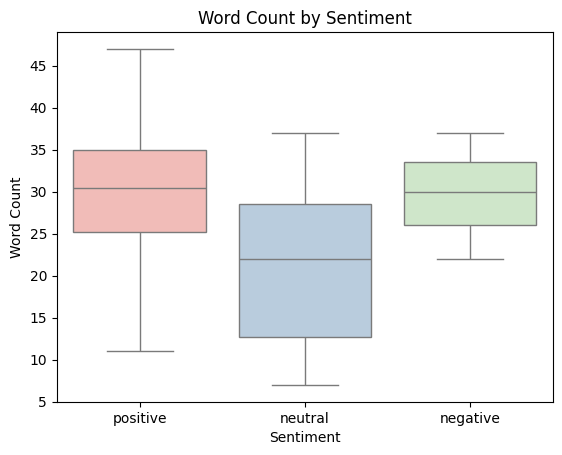

In [43]:
sns.boxplot(x='sentiment', y='text_word_count', data=tweet_list_df, palette='Pastel1')
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


<h3>kernel density estimate</h3>

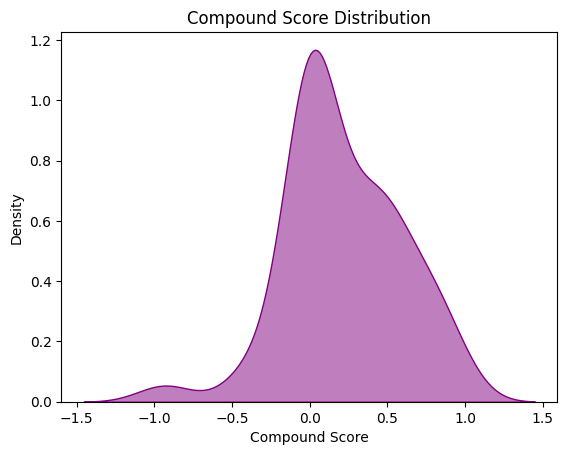

In [44]:
sns.kdeplot(tweet_list_df['compound'], fill=True, color='purple', alpha=0.5)
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()


In [45]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3>Barchart with stop words</h3>

In [46]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))



C:\Users\vasal\AppData\Roaming\nltk_data\tokenizers\punkt


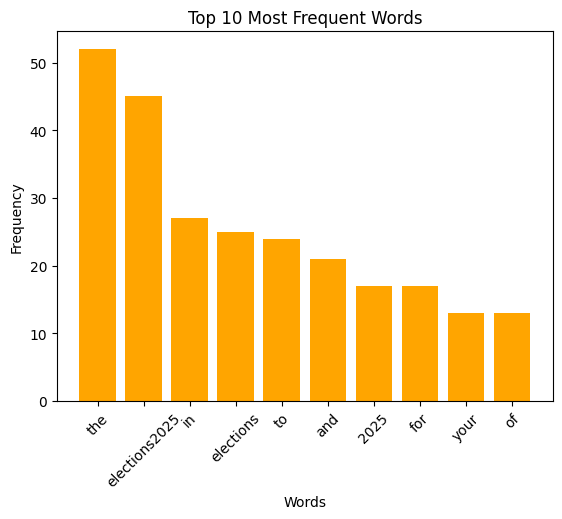

In [47]:
from collections import Counter

# Use basic splitting as an alternative
words = [word for text in tweet_list_df['cleaned'] for word in text.split()]
word_freq = Counter(words)
most_common = word_freq.most_common(10)

# Visualize
import matplotlib.pyplot as plt

words, counts = zip(*most_common)
plt.bar(words, counts, color='orange')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


<h3>Barchart with meaningful stop words</h3>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


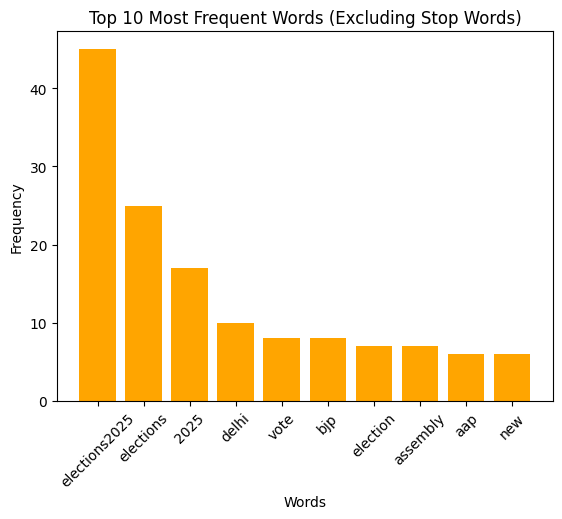

In [48]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Filter stop words from the cleaned text
words = [
    word.lower() 
    for text in tweet_list_df['cleaned'] 
    for word in text.split() 
    if word.lower() not in stop_words
]

# Count word frequencies
word_freq = Counter(words)
most_common = word_freq.most_common(10)

# Plot the most common words
words, counts = zip(*most_common)
plt.bar(words, counts, color='orange')
plt.title('Top 10 Most Frequent Words (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


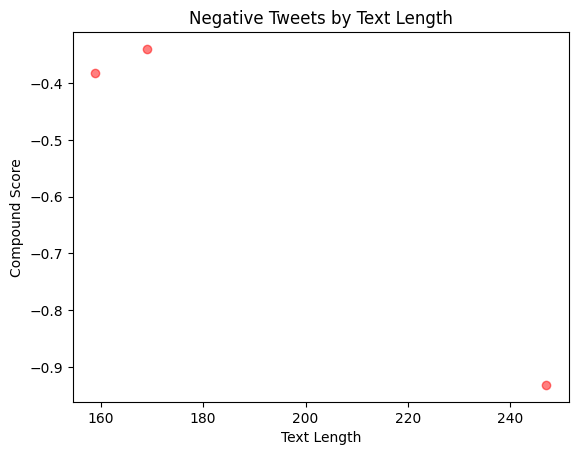

In [49]:
neg_tweets = tweet_list_df[tweet_list_df['sentiment'] == 'negative']

plt.scatter(neg_tweets['text_len'], neg_tweets['compound'], color='red', alpha=0.5)
plt.title('Negative Tweets by Text Length')
plt.xlabel('Text Length')
plt.ylabel('Compound Score')
plt.show()


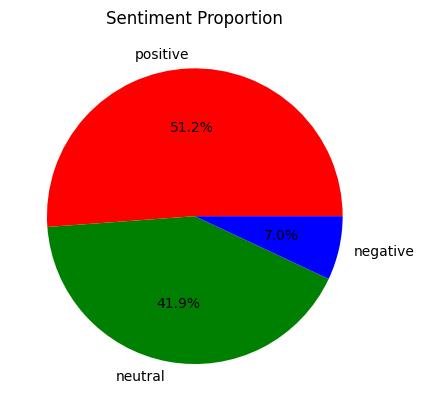

In [50]:
sentiment_counts = tweet_list_df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Sentiment Proportion')
plt.show()


<h2>Save the data frame to CSV file</h2>

In [51]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')

In [52]:
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,'Elections 2025 are heating up! 🗳️🔥 Who's your...,elections 2025 are heating up who your pick f...,0.000000,0.125000,positive,0.000,0.800,0.200,0.7579,228,33
1,LOOK: The COMELEC releases the official ballot...,look the comelec releases the official ballot ...,0.000000,0.000000,positive,0.056,0.873,0.071,0.1531,235,35
2,How Long Until the Elections? Check https://t....,how long until the elections check countdown t...,0.233333,0.383333,neutral,0.000,1.000,0.000,0.0000,176,27
3,33 prospective candidates. 9 to go! #Elections...,33 prospective candidates 9 to go elections202...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,51,8
4,Heres my #BTC Long I took. Looking to sweep th...,heres my btc long took looking to sweep the 99...,-0.050000,0.400000,negative,0.082,0.918,0.000,-0.3818,159,30
